In [1]:
#Creation of two bubble charts (income VS food insecurity - unemployment VS food insecurity) 

#The size of the bubbles represent the number of COVID-19 cases per 100,000 (11/11/20)

In [2]:
import pandas as pd
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
# make the plots a little wider by default
%matplotlib inline
plt.style.use('ggplot')

In [3]:
from google.colab import files
files.upload()

Saving data_2020.csv to data_2020.csv


{'data_2020.csv': b'State,USPS code,Unemployment 2020,"Rate of Covid-19 cases per 100,000 11/11/20",Income ,Percentage of the population food insecure in 2020,,,,,,,,,,,\r\nAlabama,AL,4.4,4213,56200,24.93393778,,,,,,,,,,,\r\nAlaska,AK,8.1,2848,78394,23.24372305,,,,,,,,,,,\r\nArizona,AZ,7.8,3615,70674,22.03693606,,,,,,,,,,,\r\nArkansas,AR,6.2,4117,54539,26.91196071,,,,,,,,,,,\r\nCalifornia,CA,8.2,2508,78105,22.43790703,,,,,,,,,,,\r\nColorado,CO,6.4,2404,72499,20.61171478,,,,,,,,,,,\r\nConnecticut,CT,8.2,2327,87291,20.22001509,,,,,,,,,,,\r\nDelaware,DE,5.1,2784,74194,28.23628325,,,,,,,,,,,\r\nFlorida,FL,6.4,3968,58368,22.84632799,,,,,,,,,,,\r\nGeorgia,GA,5.7,3877,56628,27.44557241,,,,,,,,,,,\r\nHawaii,HI,10.1,1153,88006,19.51118453,,,,,,,,,,,\r\nIdaho,ID,4.8,4221,65988,22.49923805,,,,,,,,,,,\r\nIllinois,IL,6.9,4034,74399,24.95280783,,,,,,,,,,,\r\nIndiana,IN,5,3258,66693,24.31871531,,,,,,,,,,,\r\nIowa,IA,3.6,5193,66054,20.92993616,,,,,,,,,,,\r\nKansas,KS,5.6,3625,73151,19.16428529,,,,,,,,

In [4]:
df = pd.read_csv('data_2020.csv')
df.head()

,State,USPS code,Unemployment 2020,"Rate of Covid-19 cases per 100,000 11/11/20",Income,Percentage of the population food insecure in 2020,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Alabama,AL,4.4,4213.0,56200.0,24.933938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,AK,8.1,2848.0,78394.0,23.243723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,AZ,7.8,3615.0,70674.0,22.036936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,AR,6.2,4117.0,54539.0,26.911961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,CA,8.2,2508.0,78105.0,22.437907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#we want to delete the unnamed column with no value inside
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #this piece of code is from 'https://www.codegrepper.com/code-examples/delphi/how+to+delete+Unnamed%3A+0+pandas'
df.head()

,State,USPS code,Unemployment 2020,"Rate of Covid-19 cases per 100,000 11/11/20",Income,Percentage of the population food insecure in 2020
0,Alabama,AL,4.4,4213.0,56200.0,24.933938
1,Alaska,AK,8.1,2848.0,78394.0,23.243723
2,Arizona,AZ,7.8,3615.0,70674.0,22.036936
3,Arkansas,AR,6.2,4117.0,54539.0,26.911961
4,California,CA,8.2,2508.0,78105.0,22.437907


In [10]:
state_data = df['State'][0:50]
covid_data = df['Rate of Covid-19 cases per 100,000 11/11/20'][0:50]
unemployment_data = df['Unemployment 2020'][0:50]
income_data = df['Income '][0:50]
food_data = df['Percentage of the population food insecure in 2020'][0:50]

#we select the values we want i.e. we don't select the NaN values

Text(0.5, 1.0, 'Level of unemployment VS Food insecurity and the number of COVID-19 cases per state')

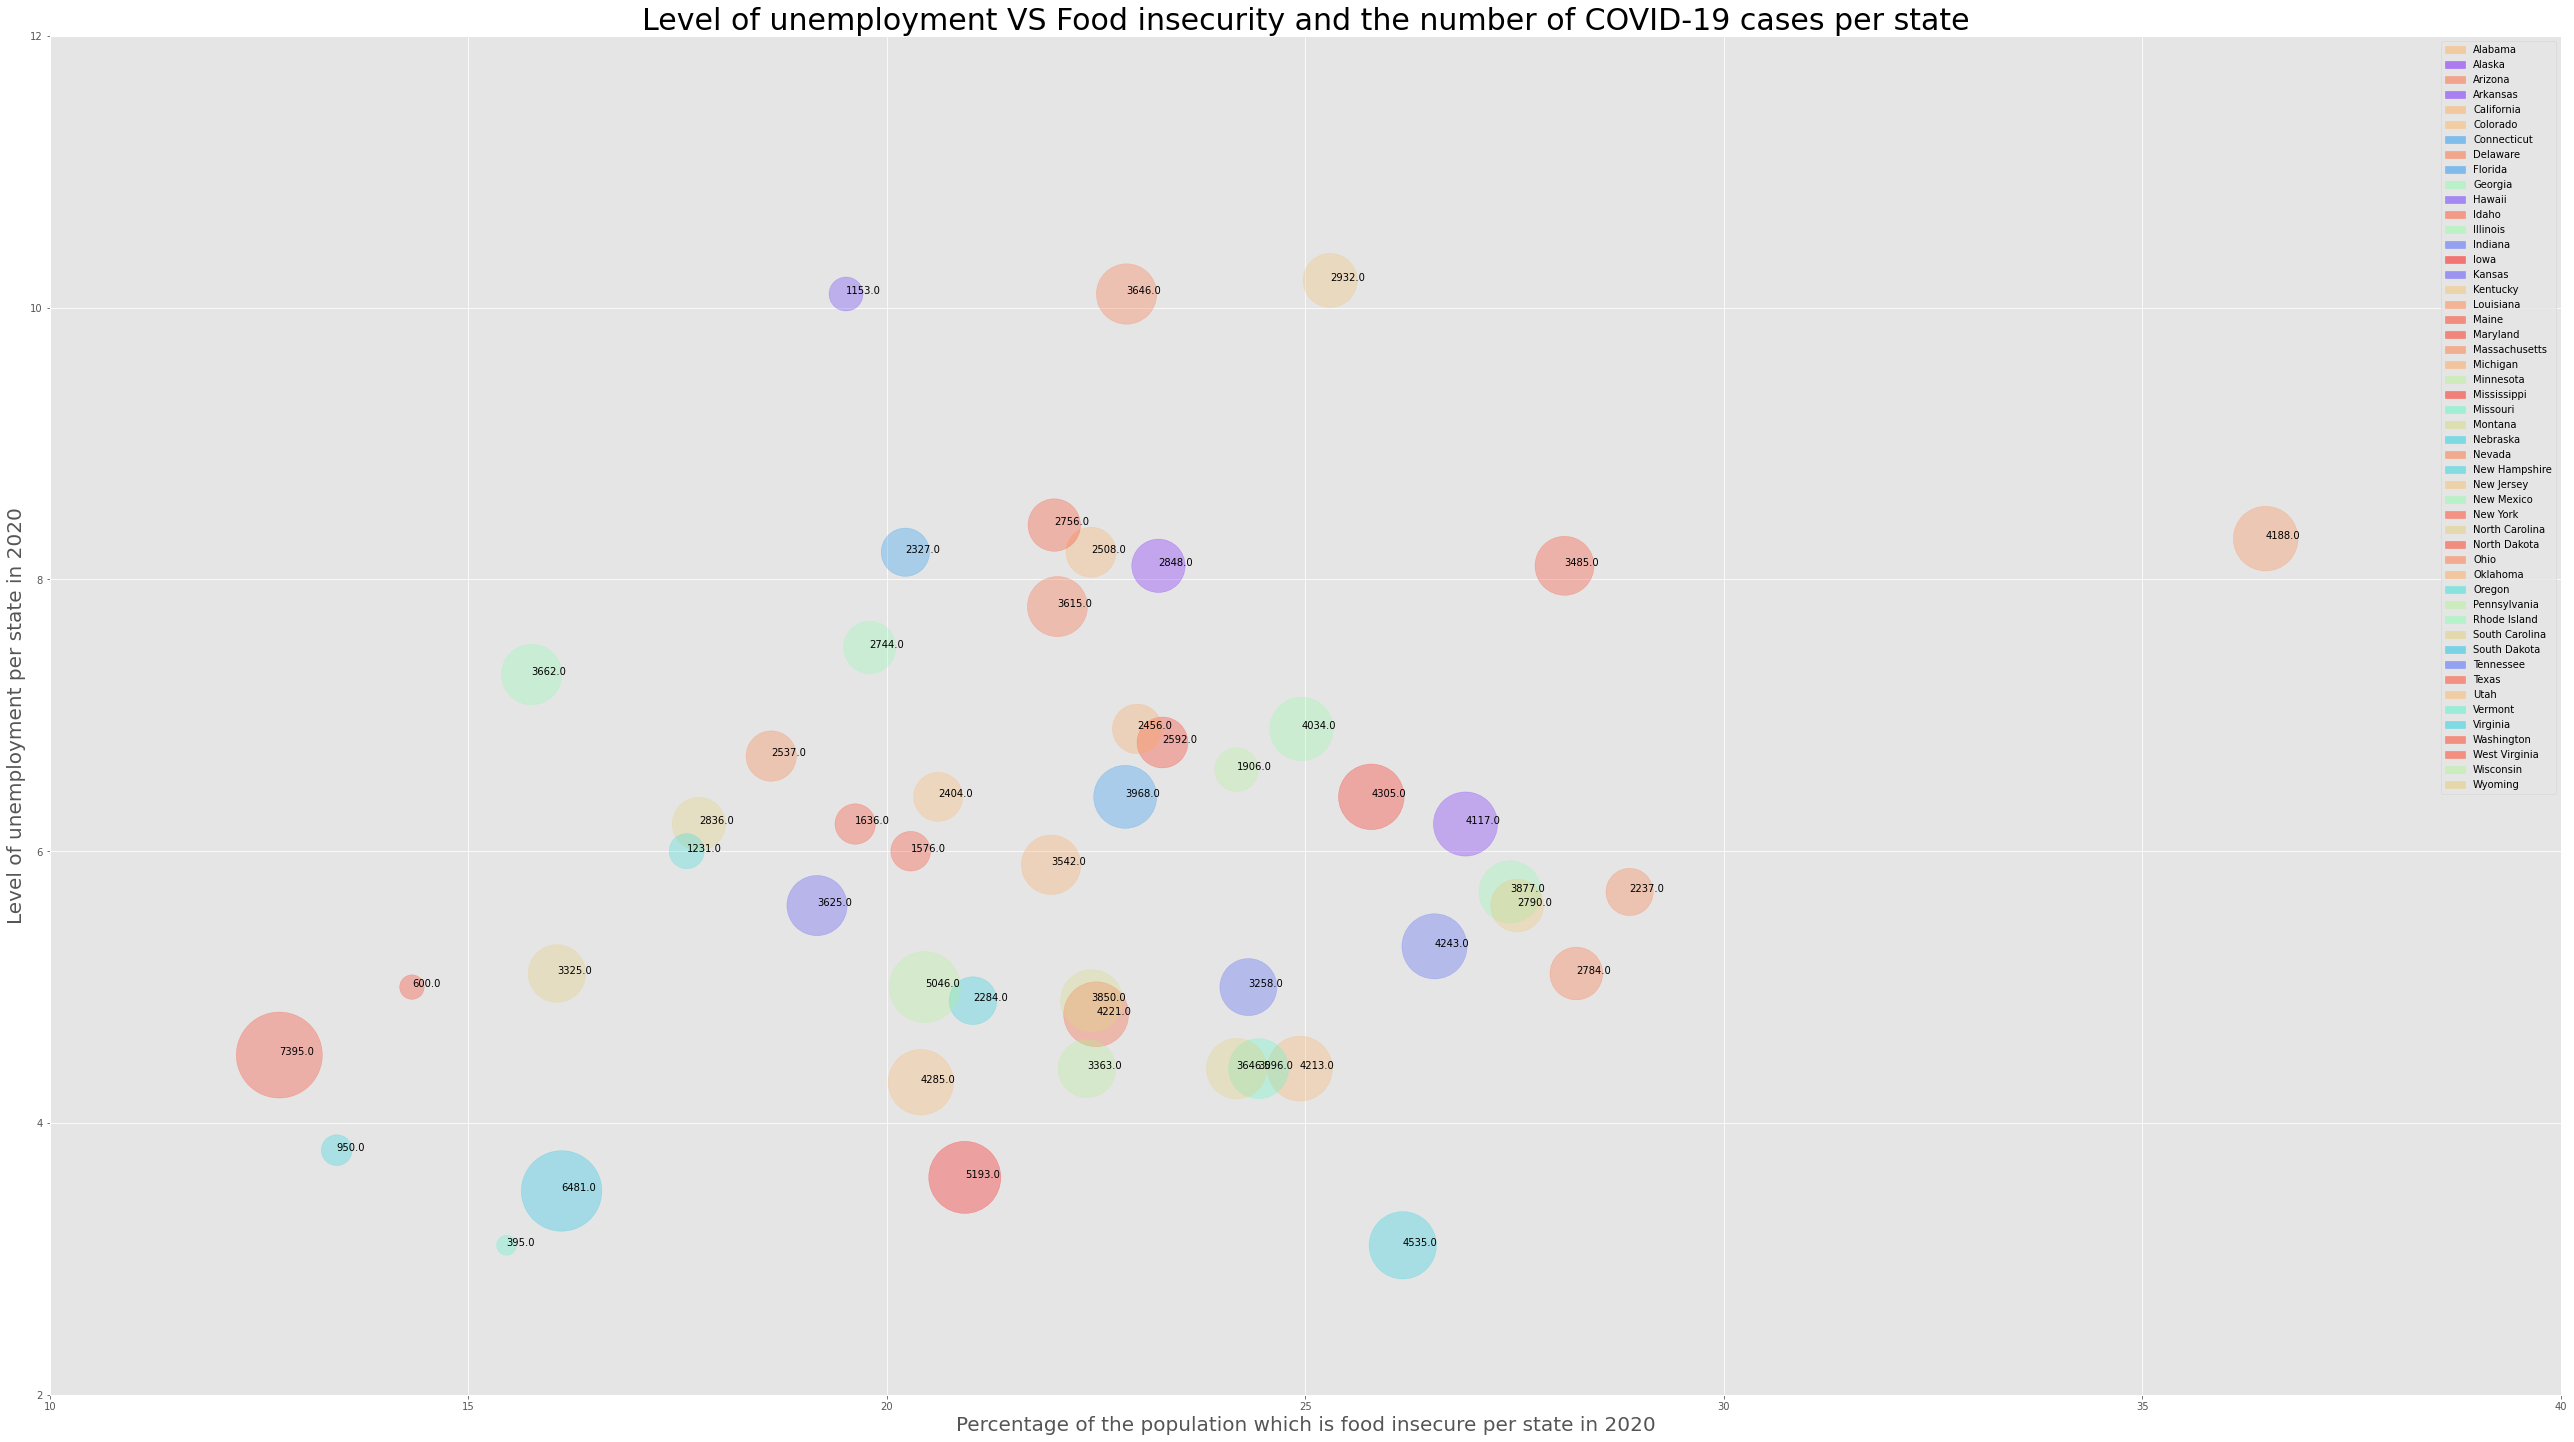

In [26]:
#1 Bubble chart - Unemployment VS food insecurity 

df1 = pd.DataFrame({
    'Percentage of the population food insecure in 2020': food_data,
    'Unemployment 2020': unemployment_data,
    'Bubble size': covid_data
})

#Choice of colours for each bubble
import matplotlib.cm as cm
import numpy as np
N=50
colors = cm.rainbow(np.random.rand(N))

#we plot our graph
plt.figure(figsize=(45,25))
plt.scatter('Percentage of the population food insecure in 2020', 'Unemployment 2020', s='Bubble size', alpha=0.3, data=df1, color=colors)

#we label the bubble
for i in range(N):
  plt.annotate(covid_data[i], xy=(food_data[i], unemployment_data[i]))

#we legend the plot
import matplotlib.patches as mpatches
legend_list=[]
for i in range(N):
    legend_list.append(mpatches.Patch(color=colors[i], alpha=0.5, label=state_data[i]))

plt.legend(handles=legend_list)

#we define the range for x and y
plt.xlim(10, 40)
plt.ylim(2, 12)

#we label our graph
plt.xlabel('Percentage of the population which is food insecure per state in 2020', size=20)
plt.ylabel('Level of unemployment per state in 2020', size=20)
plt.title('Level of unemployment VS Food insecurity and the number of COVID-19 cases per state', size=30)

#to plot this graph I used this https://datavizpyr.com/make-bubble-plot-in-python-with-matplotlib/ 

#to label and color the bubbles I used this https://stackoverflow.com/questions/35928486/bubble-chart-title-and-colors 

#for the legend I used https://www.youtube.com/watch?v=6fPBNp_XLxU 

Text(0.5, 1.0, 'Level of Income VS Food insecurity and the number of COVID-19 cases per state')

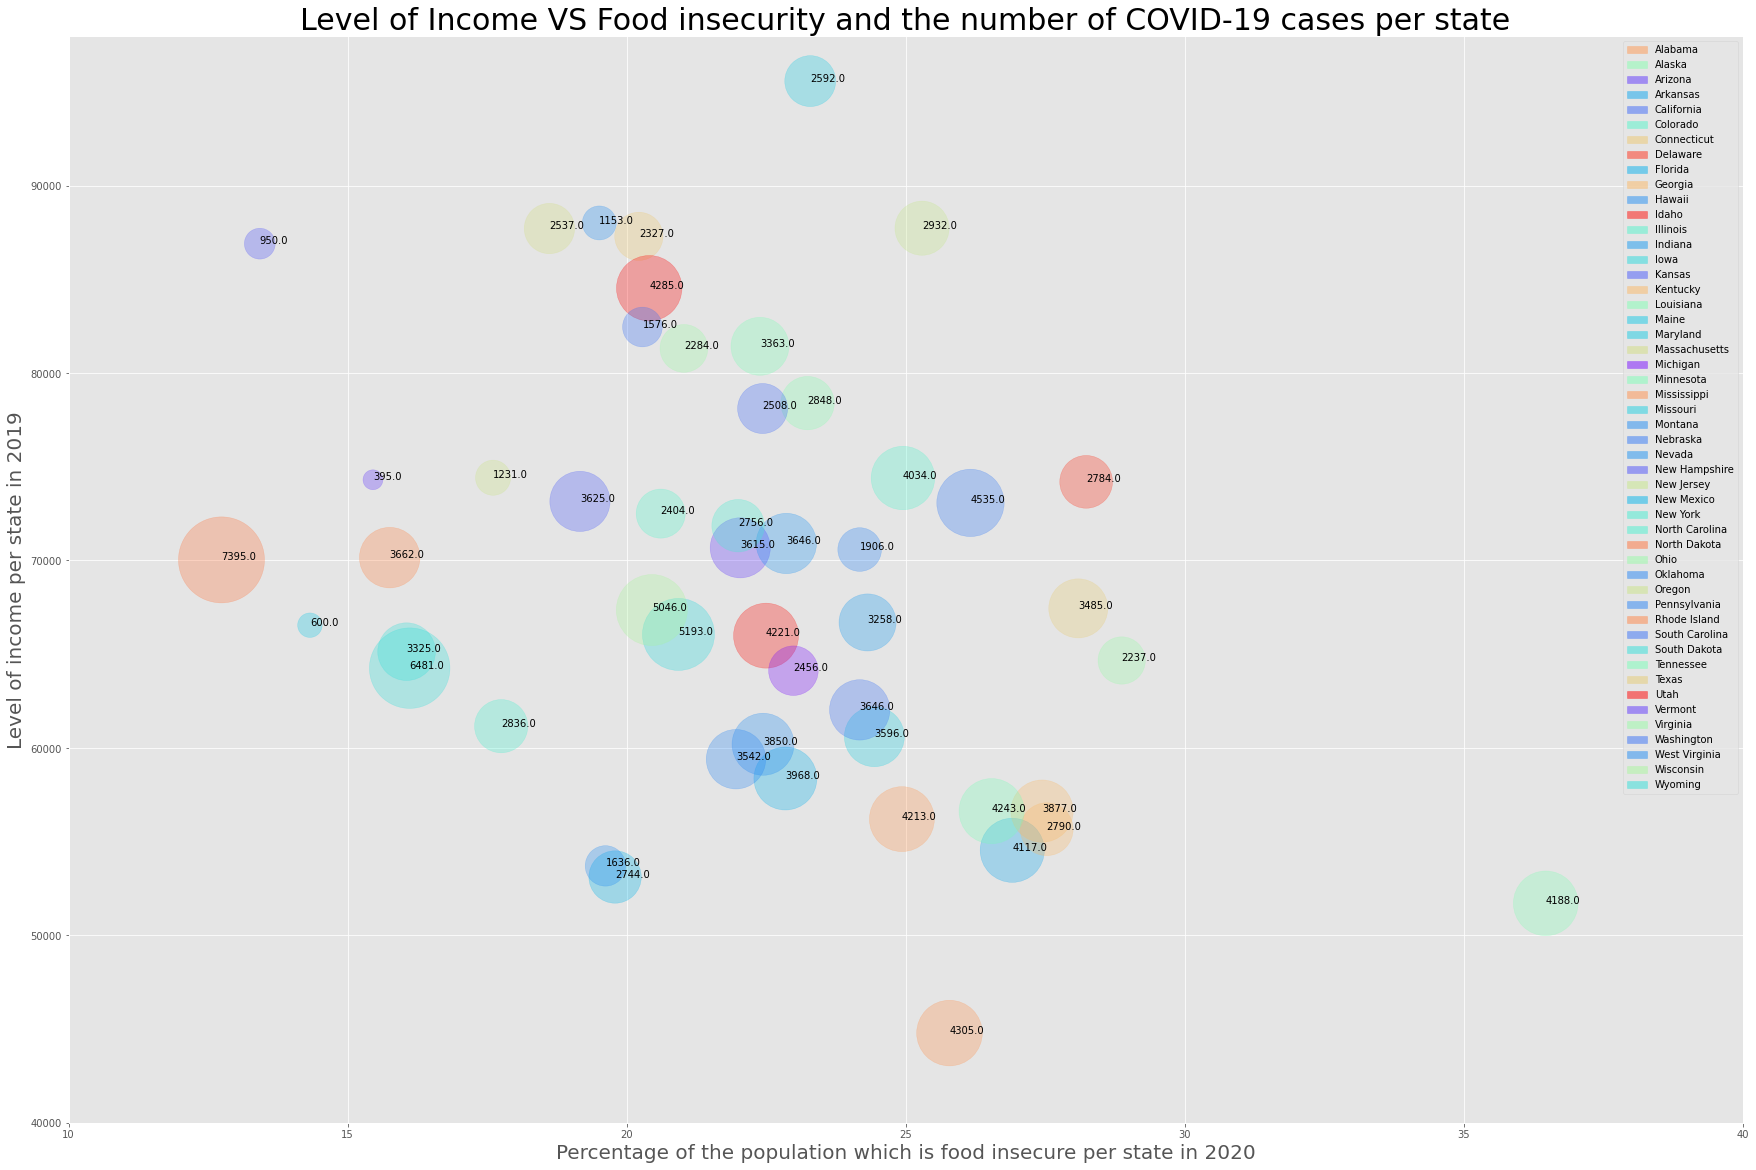

In [24]:
#2 Bubble chart - Income VS food insecurity 

df2 = pd.DataFrame({
    'Percentage of the population food insecure in 2020': food_data,
    'Income ': income_data,
    'Bubble size': covid_data
})

#Choice of colours for each bubble
import matplotlib.cm as cm
import numpy as np
N=50
colors = cm.rainbow(np.random.rand(N))

#we plot our graph
plt.figure(figsize=(30, 20))
plt.scatter('Percentage of the population food insecure in 2020', 'Income ', s='Bubble size', alpha=0.3, data=df2, color=colors)

#we label the bubble
for i in range(N):
  plt.annotate(covid_data[i], xy=(food_data[i], income_data[i]))

#we legend the plot
import matplotlib.patches as mpatches
legend_list=[]
for i in range(N):
    legend_list.append(mpatches.Patch(color=colors[i], alpha=0.5, label=state_data[i]))

plt.legend(handles=legend_list)

#we define the range for x and y
plt.xlim(10, 40)
plt.ylim(40000, 98000)

#we label our graph
plt.xlabel('Percentage of the population which is food insecure per state in 2020', size=20)
plt.ylabel('Level of income per state in 2019', size=20)
plt.title('Level of Income VS Food insecurity and the number of COVID-19 cases per state', size=30)

#to plot this graph I used this https://datavizpyr.com/make-bubble-plot-in-python-with-matplotlib/ 

#to label and color the bubbles I used this https://stackoverflow.com/questions/35928486/bubble-chart-title-and-colors 

#for the legend I used https://www.youtube.com/watch?v=6fPBNp_XLxU 